# Decision Tree vs Linear Regression: California Housing Data Analysis

This notebook analyzes and compares the performance of Decision Tree Regressor and Linear Regression models on the California Housing dataset.

In [12]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [13]:
# Load California Housing Dataset as Pandas DataFrame
california = fetch_california_housing(as_frame=True)
df = california.frame
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Missing values per column:
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


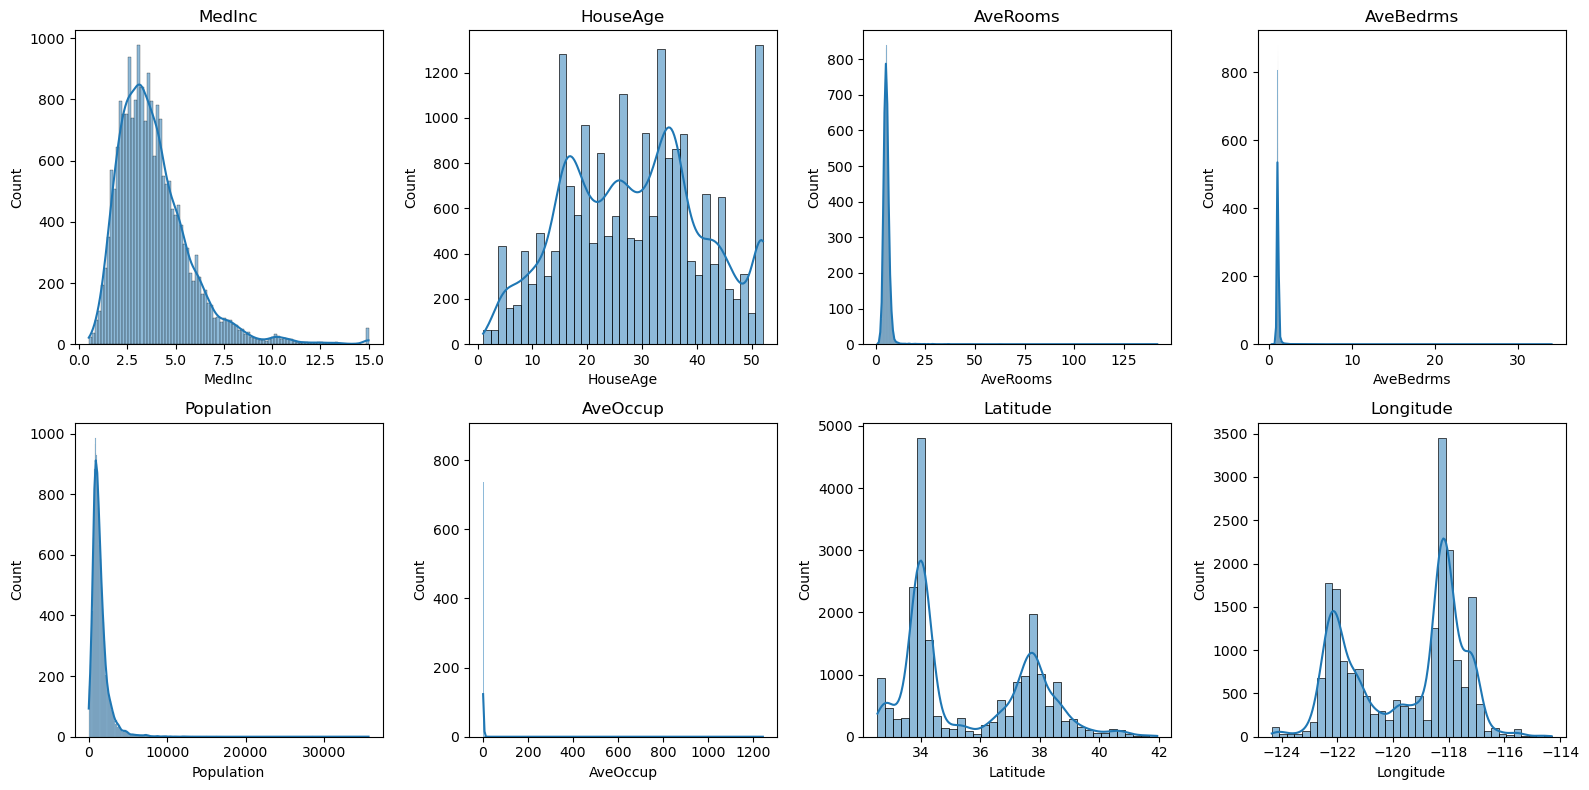

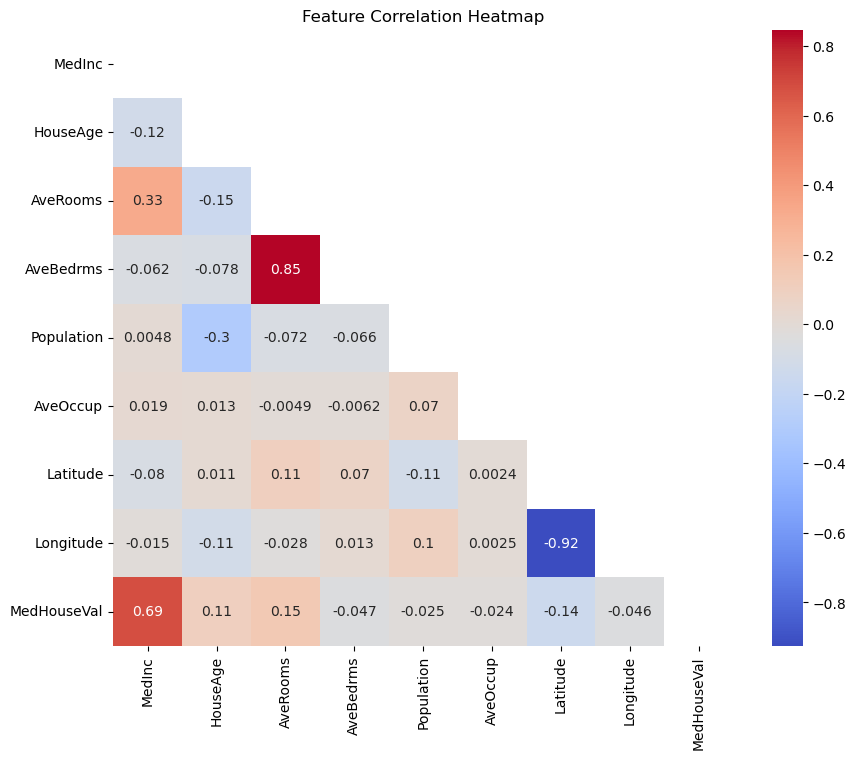

In [14]:
# Exploratory Data Analysis (EDA)
# Check for missing values
print('Missing values per column:')
print(df.isnull().sum())

# Visualize feature distributions
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
for idx, col in enumerate(california.feature_names):
    ax = axes[idx // 4, idx % 4]
    sns.histplot(df[col], ax=ax, kde=True)
    ax.set_title(col)
plt.tight_layout()
plt.show()

# Correlation heatmap
corr = df.corr();
mask = np.triu(corr);
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', mask=mask)
plt.title('Feature Correlation Heatmap')
plt.show()

In [4]:
# Split Data into Training and Test Sets (80:20)
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'Training samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}')

Training samples: 16512, Test samples: 4128


In [5]:
# Train Decision Tree Regressor
reg_tree = DecisionTreeRegressor(random_state=42)
reg_tree.fit(X_train, y_train)
y_pred_tree = reg_tree.predict(X_test)

In [6]:
# Evaluate Decision Tree Regressor Performance
r2_tree = r2_score(y_test, y_pred_tree)
rmse_tree = np.sqrt(mean_squared_error(y_test, y_pred_tree))
print(f"Decision Tree Regressor Performance:")
print(f"R^2 Score: {r2_tree:.4f}")
print(f"RMSE: {rmse_tree:.4f}")

Decision Tree Regressor Performance:
R^2 Score: 0.6187
RMSE: 0.7069


In [11]:
# Train Linear Regression Model
reg_linear = LinearRegression()
reg_linear.fit(X_train, y_train)
y_pred_linear = reg_linear.predict(X_test)

In [9]:
# Compare Performance of Decision Tree and Linear Regression
r2_linear = r2_score(y_test, y_pred_linear)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))

print("Linear Regression Performance:")
print(f"R^2 Score: {r2_linear:.4f}")
print(f"RMSE: {rmse_linear:.4f}")

print("\nComparison:")
print(f"{'Model':<20}{'R^2':<10}{'RMSE':<10}")
print(f"{'Linear Regression':<20}{r2_linear:<10.4f}{rmse_linear:<10.4f}")

Linear Regression Performance:
R^2 Score: 0.5758
RMSE: 0.7456

Comparison:
Model               R^2       RMSE      
Linear Regression   0.5758    0.7456    


## Conclusion

Based on the results from the Decision Tree Regressor and Linear Regression models:

- The Decision Tree Regressor may capture non-linear relationships in the California Housing dataset, potentially leading to better performance on complex patterns. However, it can also be prone to overfitting, especially if not tuned.
- The Linear Regression model provides a baseline for comparison and is effective when the relationship between features and target is mostly linear.
- By comparing the R² score and RMSE values, we can determine which model fits the data better. If the Decision Tree shows higher R² and lower RMSE, it outperforms Linear Regression for this dataset. Otherwise, Linear Regression may be preferable for its simplicity and generalization.

For further improvement, consider tuning the Decision Tree's hyperparameters or trying ensemble methods like Random Forests.